In [3]:
import skfda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial


In [4]:
def wf(x):
    return '/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/' + x

In [5]:
GRFx = pd.read_csv(wf('GRFx.csv'), header = None)
GRFy = pd.read_csv(wf('GRFy.csv'), header = None)
GRFz = pd.read_csv(wf('GRFz.csv'), header = None)

V_GRF_stance_N = pd.read_csv(wf('V_GRF_stance_N.csv'), header = None)
ML_GRF_stance_N = pd.read_csv(wf('ML_GRF_stance_N.csv'), header = None)
AP_GRF_stance_N = pd.read_csv(wf('AP_GRF_stance_N.csv'), header = None)

COPx = pd.read_csv(wf('COPx.csv'), header = None)
COPy = pd.read_csv(wf('COPy.csv'), header = None)

COPx_stance = pd.read_csv(wf('COPx_stance.csv'), header = None)
COPy_stance = pd.read_csv(wf('COPy_stance.csv'), header = None)

Mx = pd.read_csv(wf('Mx.csv'), header = None)
My = pd.read_csv(wf('My.csv'), header = None)
Mz = pd.read_csv(wf('Mz.csv'), header = None)

In [6]:
#Defining a list of grid points
grid_points_100 = list(range(1,101))
grid_points_2990 = list(range(1,2991))

In [7]:
#Creating an skfda object ML_GRF
ML_GRF_stance_N_matrix = ML_GRF_stance_N.to_numpy()

ML_GRF_stance_N_fd = skfda.FDataGrid(
    data_matrix=ML_GRF_stance_N_matrix,
    grid_points=grid_points_100,
)

In [8]:
#Creating an skfda object AP_GRF
AP_GRF_stance_N_matrix = AP_GRF_stance_N.to_numpy()

AP_GRF_stance_N_fd = skfda.FDataGrid(
    data_matrix=AP_GRF_stance_N_matrix,
    grid_points=grid_points_100,
)

In [9]:
#Creating an skfda object V_GRF
V_GRF_stance_N_matrix = V_GRF_stance_N.to_numpy()

V_GRF_stance_N_fd = skfda.FDataGrid(
    data_matrix=V_GRF_stance_N_matrix,
    grid_points=grid_points_100,
)

Text(0.5, 1.0, 'FPCA with a 5 component BSpline basis for VGRF_Stance_N')

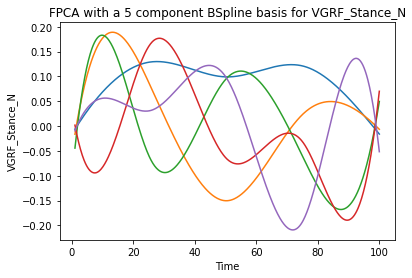

In [10]:
# BSplines representation
basis = skfda.representation.basis.BSpline(n_basis=7)
V_GRF_stance_N_basis_fd = V_GRF_stance_N_fd.to_basis(basis)

V_GRF_stance_N_fpca_bs = FPCA(n_components=5)
V_GRF_stance_N_fpca_bs.fit(V_GRF_stance_N_basis_fd)
V_GRF_stance_N_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('VGRF_Stance_N')
plt.title('FPCA with a 5 component BSpline basis for VGRF_Stance_N')

In [11]:
V_GRF_stance_N_fpca_bs.explained_variance_ratio_

array([0.80431283, 0.12857167, 0.03443897, 0.01694093, 0.01260921])

Text(0.5, 1.0, 'FPCA with a 5 component Fourier basis for VGRF_Stance_N')

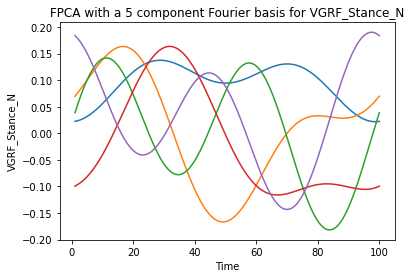

In [12]:
# Fourier basis representation
basis = skfda.representation.basis.BSpline(n_basis=7)
V_GRF_stance_N_basis_fd = V_GRF_stance_N_fd.to_basis(basis)

V_GRF_stance_N_fpca_f = FPCA(n_components=5, components_basis=Fourier(n_basis=5))
V_GRF_stance_N_fpca_f.fit(V_GRF_stance_N_basis_fd)
V_GRF_stance_N_fpca_f.components_.plot()
plt.xlabel('Time')
plt.ylabel('VGRF_Stance_N')
plt.title('FPCA with a 5 component Fourier basis for VGRF_Stance_N')

In [13]:
V_GRF_stance_N_fpca_f.explained_variance_ratio_

array([0.81682148, 0.12552258, 0.03201398, 0.01512722, 0.01051474])

In [14]:
def MSE(fd)
    
    proj = pd.DataFrame(srsf.fit_transform(fd))
    reconst = pd.DataFrame(srsf.inverse_transform(proj))
    diff = fd - reconst
    diff2 = diff*diff
    mse = np.sum(diff2)/(diff2*.shape[0]*diff2*.shape[1])
    return mse

SyntaxError: invalid syntax (4087499791.py, line 1)

### Calculate MSE

In [39]:
from skfda.datasets import make_sinusoidal_process
from skfda.misc.operators import SRSF
fd = make_sinusoidal_process(error_std=0, random_state=0)
srsf = SRSF()

In [41]:
AP_GRF_proj = srsf.fit_transform(AP_GRF_stance_N_fd)
AP_GRF_reconst = srsf.inverse_transform(AP_GRF_proj)

test = pd.DataFrame()

for i in range(0, 15696):

    row = pd.DataFrame(AP_GRF_reconst.data_matrix[i]).transpose()
    frames = [test, row]
    test = pd.concat(frames) if not test is None else test
                                  
AP_GRF_reconst_array = test.values.flatten()

AP_GRF_stance_N_df = pd.DataFrame(AP_GRF_stance_N.values)
AP_GRF_stance_N_df_array = AP_GRF_stance_N_df.values.flatten()

In [42]:
ML_GRF_proj = srsf.fit_transform(ML_GRF_stance_N_fd)
ML_GRF_reconst = srsf.inverse_transform(ML_GRF_proj)

test = pd.DataFrame()

for i in range(0, 15696):

    row = pd.DataFrame(ML_GRF_reconst.data_matrix[i]).transpose()
    frames = [test, row]
    test = pd.concat(frames) if not test is None else test
                                  
ML_GRF_reconst_array = test.values.flatten()

ML_GRF_stance_N_df = pd.DataFrame(ML_GRF_stance_N.values)
ML_GRF_stance_N_df_array = ML_GRF_stance_N_df.values.flatten()

In [43]:
V_GRF_proj = srsf.fit_transform(V_GRF_stance_N_fd)
V_GRF_reconst = srsf.inverse_transform(V_GRF_proj)

test = pd.DataFrame()

for i in range(0, 15696):

    row = pd.DataFrame(V_GRF_reconst.data_matrix[i]).transpose()
    frames = [test, row]
    test = pd.concat(frames) if not test is None else test
                                  
V_GRF_reconst_array = test.values.flatten()

V_GRF_stance_N_df = pd.DataFrame(V_GRF_stance_N.values)
V_GRF_stance_N_df_array = V_GRF_stance_N_df.values.flatten()

In [44]:
# Define function for MSE

def mse(array1,array2):
    diff = array1 - array2
    sqdiff = diff**2
    n = len(sqdiff)
    sum_sqdiff = sum(sqdiff)
    return sum_sqdiff/n

In [45]:
mse(AP_GRF_stance_N_df_array, AP_GRF_reconst_array)

37.09661412067132

In [46]:
mse(ML_GRF_stance_N_df_array, ML_GRF_reconst_array)

3.680980342217721

In [48]:
mse(V_GRF_stance_N_df_array, V_GRF_reconst_array)

75.12450727072087